In [1]:
### version of tensorflow
import tensorflow as tf
tf.__version__

'2.3.1'

In [2]:
### Using VGG9 transfer Learning Algorithm for Image Classification

### Importing Libraries
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input,Dense,Flatten,Lambda
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Providing Image_size
Image_size=[224,224]

In [4]:
vgg=VGG19(input_shape=Image_size+[3],weights='imagenet',include_top=False)

In [5]:
for layer in vgg.layers:
  layer.trainable=False

In [6]:
layer

In [7]:
folders=glob('cell_images/*')

In [8]:
folders

['cell_images\\Parasitized', 'cell_images\\Uninfected']

In [9]:
x=Flatten()(vgg.output)
x

<tf.Tensor 'flatten/Reshape:0' shape=(None, 25088) dtype=float32>

In [10]:
prediction=Dense(len(folders),activation='softmax')(x)
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 2) dtype=float32>

In [11]:
model=Model(inputs=vgg.input,outputs=prediction)
model

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [16]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [17]:
training_set = train_datagen.flow_from_directory(directory='cell_images/',
                                                   target_size = (224,224),
                                                  
                                                   batch_size = 32,
                                                   subset = 'training'
                                                   )

Found 27558 images belonging to 2 classes.


In [18]:
test_set=datagen.flow_from_directory(directory='cell_images/',target_size=(224,224),batch_size=32,subset="validation")

Found 5510 images belonging to 2 classes.


In [19]:
training_set.labels,test_set.labels

(array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 1, 1, 1]))

In [20]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
862/862 [==============================] - 6459s 7s/step - loss: 0.3912 - accuracy: 0.8352 - val_loss: 0.3879 - val_accuracy: 0.8281
Epoch 2/5
862/862 [==============================] - 5597s 6s/step - loss: 0.2915 - accuracy: 0.8860 - val_loss: 0.2671 - val_accuracy: 0.8929
Epoch 3/5
862/862 [==============================] - 5493s 6s/step - loss: 0.2621 - accuracy: 0.9002 - val_loss: 0.2224 - val_accuracy: 0.9209
Epoch 4/5
862/862 [==============================] - 5527s 6s/step - loss: 0.2534 - accuracy: 0.9082 - val_loss: 0.3338 - val_accuracy: 0.8737
Epoch 5/5
862/862 [==============================] - 5486s 6s/step - loss: 0.2541 - accuracy: 0.9096 - val_loss: 0.2251 - val_accuracy: 0.9154


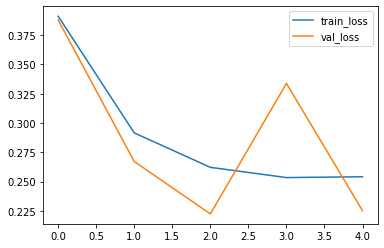

<Figure size 432x288 with 0 Axes>

In [21]:
 #### loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.savefig('Lossval_loss.png')

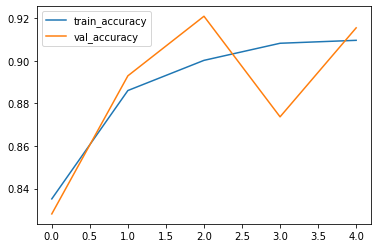

<Figure size 432x288 with 0 Axes>

In [22]:
#### loss
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy.png')

In [23]:
model.save('maleria_detection_vgg19.h5')